In [1]:
# # #import required modules
# import zipfile

# # #First open the file in read mode
# unzip_files = zipfile.ZipFile('IAB.zip','r')

# # #Now we will unzip and put those files in a directory called extracted_dir
# unzip_files.extractall("IAB")

In [2]:
# !pip install split-folders

In [3]:
#import splitfolders

# # Split with a ratio.
# # To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#splitfolders.ratio("/LAB/SGP-II/IAB", output="/LAB/SGP-II/Dataset/",seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

In [4]:
pip install seaborn

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install numpy==1.23.4

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [7]:
# Define hierarchical categories
categories = {
    "IAB1 Arts And Entertainment": ["IAB1_1_Books", "IAB1_5_Movies", "IAB1_6_Music"],
    "IAB2 Automotive": ["IAB2_11_Hatchback", "IAB2_14_MiniVan", "IAB2_15_Mororcycles", "IAB2_21_Trucks  Accessories"],
    "IAB3 Business": ["IAB3_6_Forestry"],
    "IAB17 Sports": ["IAB17_5_Boxing", "IAB17_6_CanoeING", "IAB17_7_Cheerleading", "IAB17_9_Cricket", "IAB17_11_Fly Fishing", "IAB17_12_Football", "IAB17_15_Golf", "IAB17_16_Horse Racing", "IAB17_29_Rugby", "IAB17_31_SailING", "IAB17_36_Snowboarding", "IAB17_37_Surfing", "IAB17_38_Swimming", "IAB17_39_Table Tennis", "IAB17_40_Tennis", "IAB17_41_Volleyball"]
}

In [8]:
# Data directories
train_dir = "/LAB/SGP-II/Dataset/train"
test_dir = "/LAB/SGP-II/Dataset/test"
val_dir = "/LAB/SGP-II/Dataset/val"

In [9]:
# Image dimensions
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Learning rate
LEARNING_RATE = 0.01

In [10]:
# Data Generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 2313 images belonging to 24 classes.
Found 280 images belonging to 24 classes.
Found 311 images belonging to 24 classes.


In [11]:
# Build the model
#with tf.device("/GPU:1"):
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

2024-12-19 17:16:13.546502: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22118 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:3b:00.0, compute capability: 8.6
2024-12-19 17:16:13.548373: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22118 MB memory:  -> device: 1, name: NVIDIA RTX A5000, pci bus id: 0000:af:00.0, compute capability: 8.6


In [12]:
optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100
)

2024-12-19 17:16:14.207045: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2024-12-19 17:16:15.609747: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204
2024-12-19 17:16:17.885344: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


73/73 [==============================] - 10s 77ms/step - loss: 3.1528 - accuracy: 0.0592 - val_loss: 3.0792 - val_accuracy: 0.0857
Epoch 2/100
73/73 [==============================] - 5s 72ms/step - loss: 2.9895 - accuracy: 0.1314 - val_loss: 2.9121 - val_accuracy: 0.1571
Epoch 3/100
73/73 [==============================] - 5s 73ms/step - loss: 2.7169 - accuracy: 0.2240 - val_loss: 2.6126 - val_accuracy: 0.2071
Epoch 4/100
73/73 [==============================] - 5s 71ms/step - loss: 2.3905 - accuracy: 0.3113 - val_loss: 2.5267 - val_accuracy: 0.2536
Epoch 5/100
73/73 [==============================] - 5s 71ms/step - loss: 2.1374 - accuracy: 0.3779 - val_loss: 2.4122 - val_accuracy: 0.2893
Epoch 6/100
73/73 [==============================] - 5s 70ms/step - loss: 1.9032 - accuracy: 0.4475 - val_loss: 2.2698 - val_accuracy: 0.3464
Epoch 7/100
73/73 [==============================] - 5s 69ms/step - loss: 1.6658 - accuracy: 0.4959 - val_loss: 2.0517 - val_accuracy: 0.4250
Epoch 8/100
73/73

In [14]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

311/311 [==============================] - 1s 2ms/step - loss: 2.7156 - accuracy: 0.5338
Test Accuracy: 0.5337620377540588


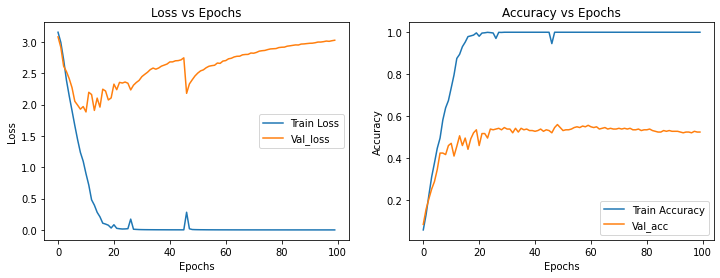

In [15]:
# Plot loss and accuracy
def plot_metrics(history):
    plt.figure(figsize=(12, 4))
    
    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'],label='Val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epochs')
    plt.legend()
    
    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'],label = 'Val_acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epochs')
    plt.legend()

    plt.show()

plot_metrics(history)

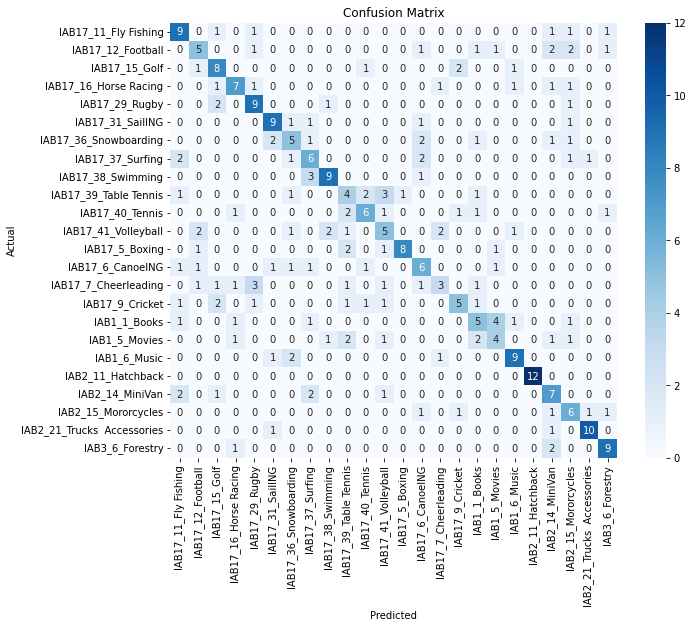

In [16]:
# Confusion matrix and classification report
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [17]:
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Classification Report:
                             precision    recall  f1-score   support

       IAB17_11_Fly Fishing       0.53      0.64      0.58        14
          IAB17_12_Football       0.45      0.36      0.40        14
              IAB17_15_Golf       0.50      0.62      0.55        13
      IAB17_16_Horse Racing       0.58      0.54      0.56        13
             IAB17_29_Rugby       0.56      0.69      0.62        13
           IAB17_31_SailING       0.64      0.69      0.67        13
      IAB17_36_Snowboarding       0.42      0.38      0.40        13
           IAB17_37_Surfing       0.40      0.46      0.43        13
          IAB17_38_Swimming       0.69      0.69      0.69        13
      IAB17_39_Table Tennis       0.31      0.31      0.31        13
            IAB17_40_Tennis       0.55      0.46      0.50        13
        IAB17_41_Volleyball       0.36      0.36      0.36        14
             IAB17_5_Boxing       0.89      0.62      0.73        13
          

In [18]:
# Predict a single image
def classify_image(image_path, model, categories):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT)) / 255.0
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_class_index]

    for parent, subcategories in categories.items():
        if predicted_class in subcategories:
            print(f"Sub Category: {predicted_class}, Main Category: {parent}")
            break

# Example usage
image_path = "/LAB/SGP-II/Dataset/test/IAB2_15_Mororcycles/1570811001164.jpg"
classify_image(image_path, model, categories)

Sub Category: IAB2_15_Mororcycles, Main Category: IAB2 Automotive


In [19]:
#cd /LAB/SGP-II/Dataset/train

In [20]:
#ls -a

In [21]:
#rmdir .ipynb_checkpoints/

In [22]:
#cd /LAB/SGP-II/Dataset/test

In [23]:
#ls -a

In [24]:
#rmdir .ipynb_checkpoints/

In [25]:
#cd /LAB/SGP-II/Dataset/val

In [26]:
#ls -a

In [27]:
#rmdir .ipynb_checkpoints/